# 10.16 Intro to Data Science: Time Series and Simple Linear Regression 
* **Time series**: Sequences of values (**observations**) associated with points in time
    * daily closing stock prices
    * hourly temperature readings 
    * changing positions of a plane in flight
    * annual crop yields 
    * quarterly company profits
    * time-stamped tweets from Twitter users worldwide
* We’ll use simple linear regression to make predictions from time series data

### Time Series
* **Univariate time series**: _One_ observation per time
* **Multivariate time series**: _Two or more_ observations per time
* Two tasks often performed with time series are:
    * **Time series analysis**, which looks at existing time series data for patterns (like **seasonality**), helping data analysts understand the data
    * **Time series forecasting**, which uses past data to predict the future
* We’ll perform time series forecasting

### Simple Linear Regression
* Given a collection of values representing an **independent variable** (the month/year combination) and a **dependent variable** (the average high temperature for that month/year), simple linear regression describes the relationship between these variables with a straight line, known as the **regression line**

### Linear Relationships
* Given a Fahrenheit temperature, we can calculate the corresponding Celsius temperature using:
>```python
c = 5 / 9 * (f - 32)
```
* `f` (the Fahrenheit temperature) is the _independent variable_
* `c` (the Celsius temperature) is the _dependent variable_
* Each value of `c` _depends on_ the value of `f` used in the calculation

### Linear Relationships (cont.)
* Plotting Fahrenheit temperatures and their corresponding Celsius temperatures produces a straight line

A lambda function is a small anonymous function. A lambda function can take any number of arguments, but can only have one expression.

lambda arguments : expression

x = lambda a : a + 10
print(x(5)) # 15 will be printed out


x = lambda a, b : a * b
print(x(5, 6)) # 30 will be printed out

In [1]:
# enable high-res images in notebook 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
c = lambda f: 5 / 9 * (f - 32)

In [3]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

* Place the data in a `DataFrame`, then use its **`plot` method** to display the linear relationship between the temperatures
* `style` keyword argument controls the data’s appearance
    * `'.-'` indicates that each point should appear as a dot, and that lines should connect the dots

In [4]:
import pandas as pd

In [5]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

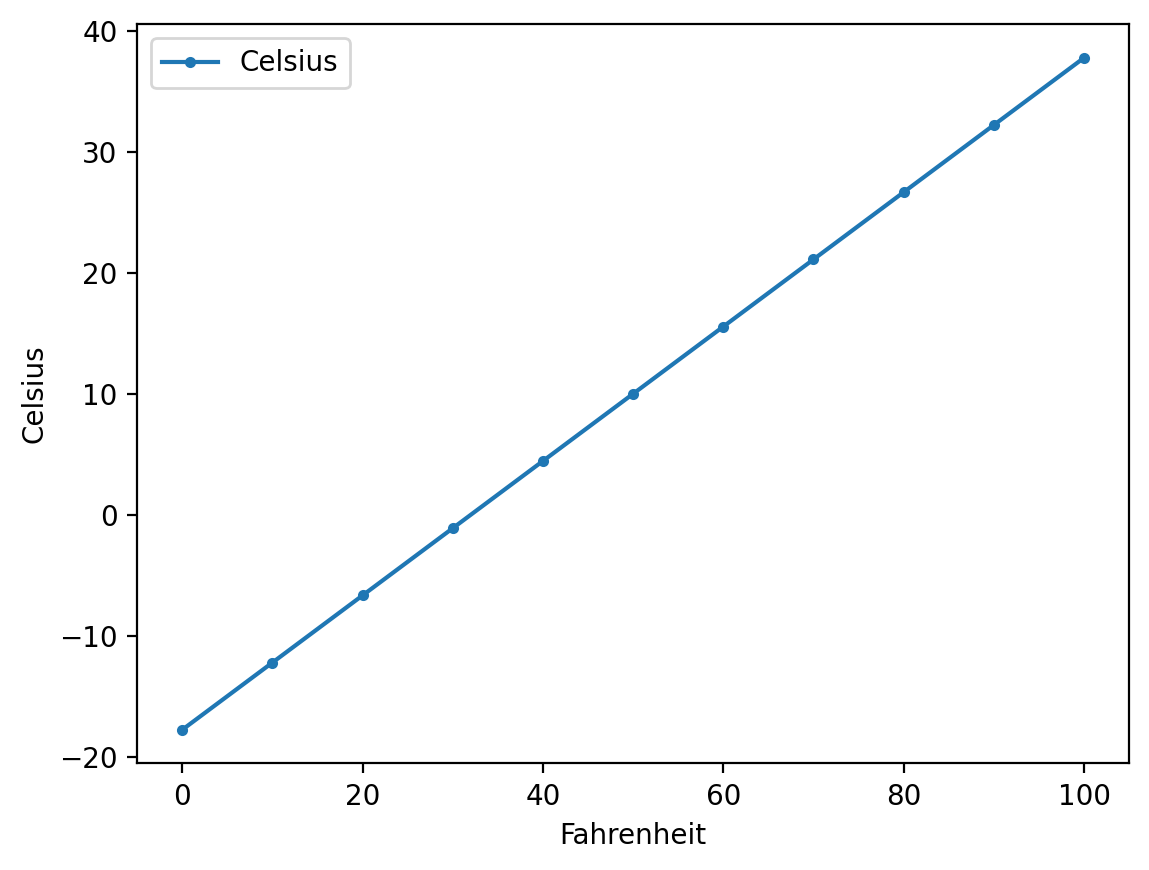

In [8]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

### Components of the Simple Linear Regression Equation 
The points along any straight line can be calculated with:

\begin{equation}
y = m x + b
\end{equation}

* **_m_** is the line’s **`slope`**,
* **_b_** is the line’s **`intercept** with the **_y_-axis** (at **_x_** = 0), 
* **_x_** is the independent variable (the date in this example)
* **_y_** is the dependent variable (the temperature in this example)
* In simple linear regression, **_y_** is the _predicted value_ for a given **_x_**

### Function `linregress` from the SciPy’s `stats` Module
* Simple linear regression determines slope (**_m_**) and intercept (**_b_**) of a straight line that best fits your data
* Following diagram shows a few of the time-series data points we’ll process in this section and a corresponding regression line
    * We added vertical lines to indicate each data point’s distance from the regression line

![A few time series data points and a regression line](ch10images/distance.png "A few time series data points and a regression line")

### Function `linregress` from the SciPy’s `stats` Module (cont.)
* Simple linear regression algorithm iteratively adjusts the slope and intercept and, for each adjustment, calculates the square of each point’s distance from the line
* “Best fit” occurs when slope and intercept values minimize sum of those squared distances
    * **ordinary least squares** calculation
* **SciPy (Scientific Python)** is widely used for engineering, science and math in Python
    * **`linregress`** function (from the **`scipy.stats` module**) performs simple linear regression for you

### Getting Weather Data from NOAA
* The National Oceanic and Atmospheric Administration (NOAA) offers public historical data including time series for average high temperatures in specific cities over various time intervals
* Obtained the January average high temperatures for New York City from 1895 through 2018 from NOAA’s “Climate at a Glance” time series at: 
> https://www.ncdc.noaa.gov/cag/
* `ave_hi_nyc_jan_1895-2018.csv` in the `ch10` examples folder
* Three columns per observation:
    * `Date`—A value of the form `'YYYYMM’` (such as `'201801'`). `MM` is always `01` because we downloaded data for only January of each year. 
    * `Value`—A floating-point Fahrenheit temperature.
    * `Anomaly`—The difference between the value for the given date and average values for all dates (not used in this example)

### Loading the Average High Temperatures into a `DataFrame` 

In [9]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

* Get a sense of the data

In [10]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [11]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Cleaning the Data
* For readability, rename the `'Value'` column as `'Temperature'`

In [12]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [13]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


* Seaborn labels the tick marks on the **_x_**-axis with `Date` values
* **_x_**-axis labels will be more readable if they do not contain `01` (for January), so we’ll remove it from each `Date`
* Check the column’s type:

In [14]:
nyc.Date.dtype

dtype('int64')

* Values are integers, so we can divide by 100 to truncate the last two digits
* `Series` method `floordiv` performs _integer division_ on every element of the `Series`

In [15]:
nyc.Date = nyc.Date.floordiv(100)

In [16]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Calculating Basic Descriptive Statistics for the Dataset
* Call `describe` on the `Temperature` column

In [18]:
pd.set_option('display.precision', 2)

In [19]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Forecasting Future January Average High Temperatures
* **SciPy (Scientific Python) library** widely used for engineering, science and math in Python
* **`stats` module** provides function **`linregress`**, which calculates a regression line’s _slope_ and _intercept_ 

In [20]:
from scipy import stats

In [22]:
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

* `linregress` receives two one-dimensional arrays of the same length representing the data points’ **_x_**- and **_y_**-coordinates
    * `x`and `y` represent the independent and dependent variables, respectively
* Returns the regression line’s `slope` and `intercept`

In [23]:
linear_regression.slope

0.014771361132966163

In [24]:
linear_regression.intercept

8.694993233674289

* Use these values with the simple linear regression equation for a straight line to predict the average January temperature in New York City for a given year
* In the following calculation, `linear_regression.slope` is **_m_**, `2019` is **_x_** (the date value for which you’d like to predict the temperature), and `linear_regression.intercept` is **_b_**:

In [25]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

* Approximate the average temperature for January of 1890:


In [26]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

* We had data for 1895–2018
* The further you go outside this range, the less reliable the predictions will be 

### Plotting the Average High Temperatures and a Regression Line
* Seaborn’s **`regplot` function** plots each data point with the dates on the **_x_****-axis and the temperatures on the **_y_**-axis
* Creates a **scatter plot** or **scattergram** representing the `Temperature`s for the given `Date`s and adds the regression line
* Function `regplot`’s `x` and `y` keyword arguments are one-dimensional arrays of the same length representing the **_x-y_** coordinate pairs to plot

In [27]:
import seaborn as sns

In [28]:
sns.set_style('whitegrid')

(10.0, 70.0)

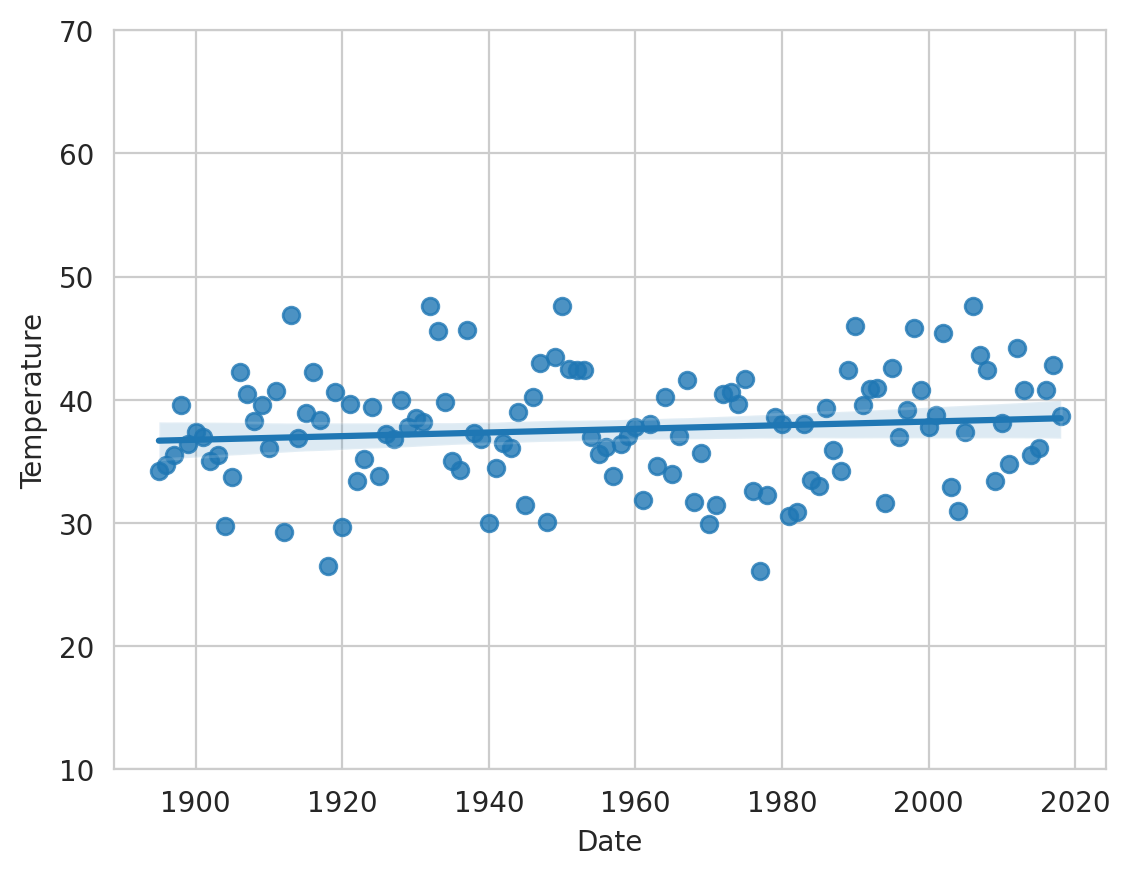

In [29]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

* In this graph, the _y_-axis represents a 21.5-degree temperature range between the minimum of 26.1 and the maximum of 47.6
* By default, the data appears to be spread significantly above and below the regression line, making it difficult to see the linear relationship
* Common issue in data analytics visualizations
* Seaborn and Matplotlib _auto-scale_ the axes, based on the data’s range of values
* We scaled the **_y_**-axis range of values to emphasize the linear relationship

### Getting Time Series Datasets

| Sources time-series dataset
| ------------------
| https://data.gov/ 
| This is the U.S. government’s open data portal. Searching for “time series” yields over 7200 time-series datasets.
| https://www.ncdc.noaa.gov/cag/`
| The National Oceanic and Atmospheric Administration (NOAA) Climate at a Glance portal provides both global and U.S. weather-related time series.
| https://www.esrl.noaa.gov/psd/data/timeseries/
| NOAA’s Earth System Research Laboratory (ESRL) portal provides monthly and seasonal climate-related time series.
| https://www.quandl.com/search
| Quandl provides hundreds of free financial-related time series, as well as fee-based time series.
| https://datamarket.com/data/list/?q=provider:tsdl
| The Time Series Data Library (TSDL) provides links to hundreds of time series datasets across many industries.
| http://archive.ics.uci.edu/ml/datasets.html
| The University of California Irvine (UCI) Machine Learning Repository contains dozens of time-series datasets for a variety of topics.
| http://inforumweb.umd.edu/econdata/econdata.html
| The University of Maryland’s EconData service provides links to thousands of economic time series from various U.S. government agencies. 